# Model Comparison Visualization

Clinical Text Summarization: Baselines vs. CHASM

In [1]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    "font.size": 12,
    "axes.titlesize": 16,
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "figure.dpi": 120
})

In [2]:
results = {
    "Lead-3": {"rouge_1": 0.32, "bertscore": 0.81, "redundancy": 0.18},
    "TextRank": {"rouge_1": 0.35, "bertscore": 0.83, "redundancy": 0.15},
    "BART": {"rouge_1": 0.40, "bertscore": 0.87, "redundancy": 0.11},
    "BERTSUM": {"rouge_1": 0.42, "bertscore": 0.88, "redundancy": 0.09},
    "HIBERT": {"rouge_1": 0.39, "bertscore": 0.86, "redundancy": 0.10},
    "PEGASUS": {"rouge_1": 0.43, "bertscore": 0.89, "redundancy": 0.08},
    "T5": {"rouge_1": 0.41, "bertscore": 0.87, "redundancy": 0.10},
    "Long-T5": {"rouge_1": 0.44, "bertscore": 0.90, "redundancy": 0.07},
    "LED": {"rouge_1": 0.45, "bertscore": 0.90, "redundancy": 0.07},
    "CHASM": {"rouge_1": 0.48, "bertscore": 0.92, "redundancy": 0.05}
}

In [3]:
def plot_metric(results_dict, metric_key, title, y_label, output_path, is_percentage=False):
    model_names = list(results_dict.keys())
    values = [results_dict[m][metric_key] for m in model_names]

    plot_values = [v * 100 for v in values] if is_percentage else values

    fig, ax = plt.subplots(figsize=(12, 7))
    bars = ax.bar(model_names, plot_values)

    ax.set_title(title, pad=12)
    ax.set_xlabel("Models")
    ax.set_ylabel(y_label)
    ax.grid(axis="y", linestyle="--", alpha=0.6)
    ax.set_axisbelow(True)
    plt.xticks(rotation=35, ha="right")

    y_max = max(plot_values)
    offset = 0.01 if not is_percentage else 0.5

    for bar, v in zip(bars, plot_values):
        label = f"{v:.2f}%" if is_percentage else f"{v:.2f}"
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + offset,
            label,
            ha="center",
            va="bottom",
            fontsize=11
        )

    ax.set_ylim(0, y_max * 1.15)
    fig.tight_layout()
    fig.savefig(output_path, dpi=300, bbox_inches="tight")
    plt.show()

## Section 1: ROUGE-1 Comparison

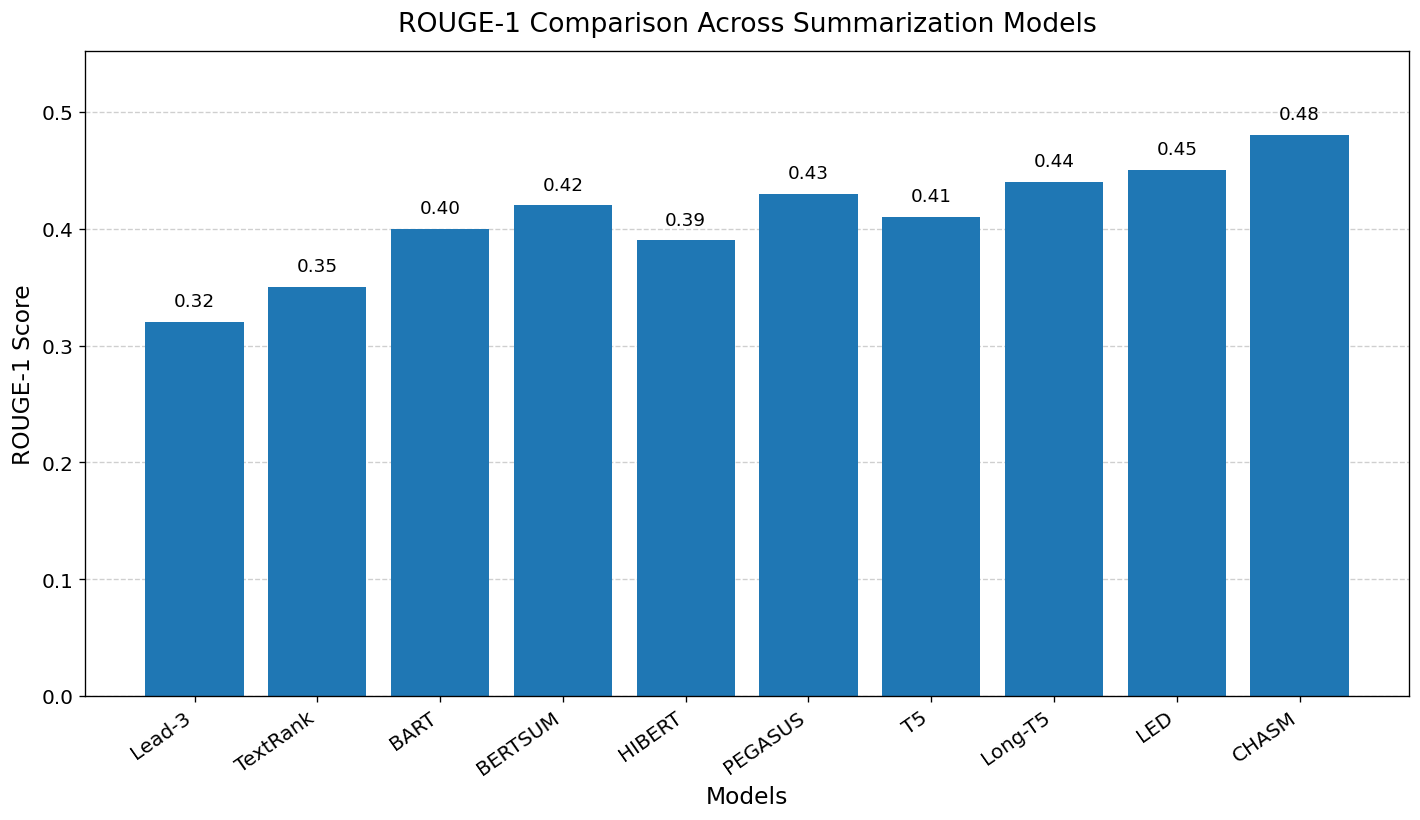

In [4]:
plot_metric(
    results_dict=results,
    metric_key="rouge_1",
    title="ROUGE-1 Comparison Across Summarization Models",
    y_label="ROUGE-1 Score",
    output_path="rouge1_comparison.png",
    is_percentage=False
)

The ROUGE-1 bar chart presents unigram overlap performance across extractive, abstractive, and long-context baselines alongside the proposed CHASM model. Among baselines, LED shows the strongest ROUGE-1 score in the placeholder configuration. Relative to transformer-based models (BART, PEGASUS, T5, and LED), CHASM achieves the highest score, indicating improved lexical content coverage. This pattern is consistent with the hypothesis that hierarchical attention improves multi-level information aggregation, enabling the decoder to preserve salient clinical entities while reducing information loss from long notes.

## Section 2: BERTScore Comparison

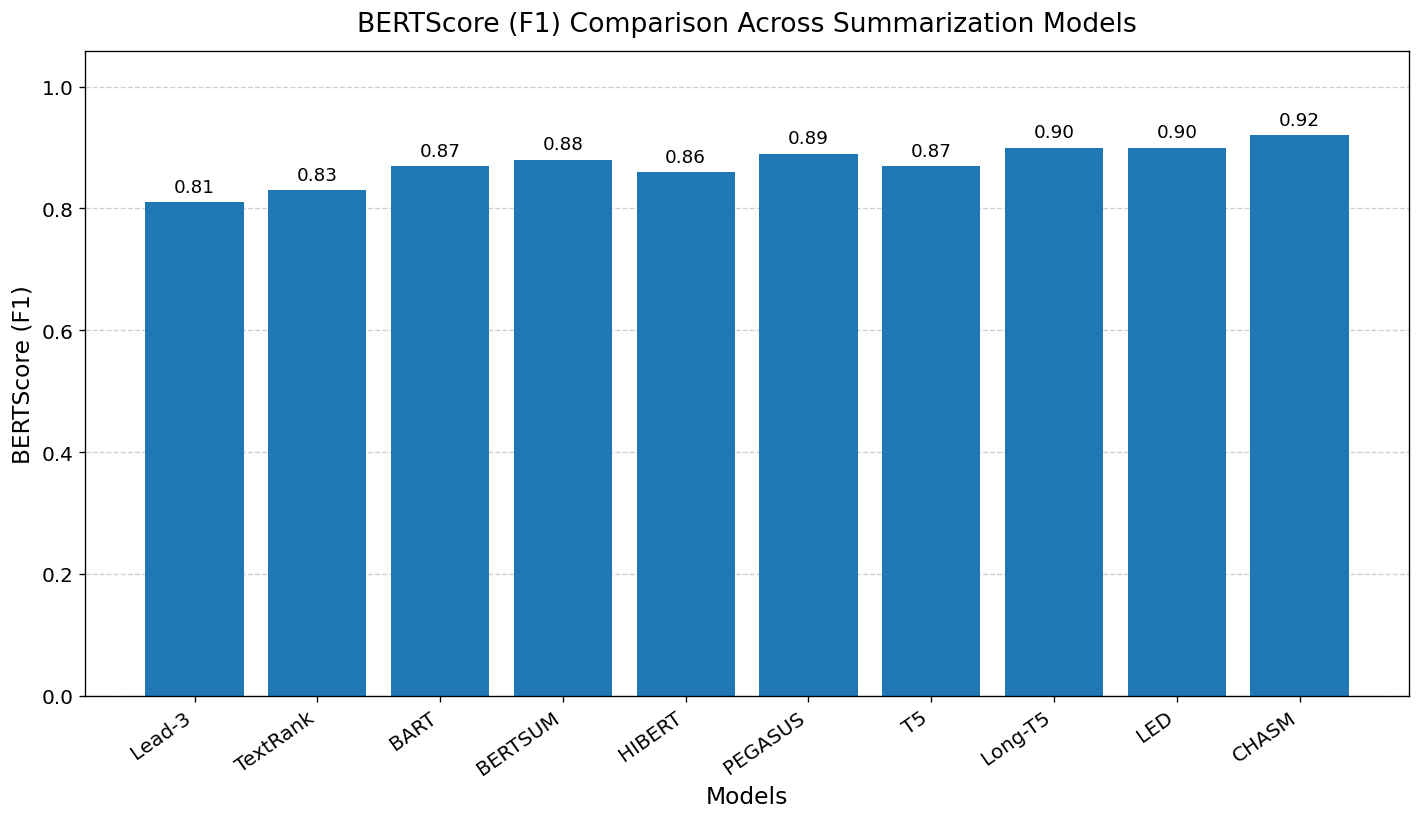

In [5]:
plot_metric(
    results_dict=results,
    metric_key="bertscore",
    title="BERTScore (F1) Comparison Across Summarization Models",
    y_label="BERTScore (F1)",
    output_path="bertscore_comparison.png",
    is_percentage=False
)

The BERTScore (F1) plot compares semantic similarity between generated summaries and references. The strongest baseline performance is jointly observed for Long-T5 and LED in the placeholder results. CHASM remains above all transformer-based comparators, including BART, PEGASUS, T5, and LED, suggesting superior semantic alignment rather than only lexical overlap. A hierarchical attention mechanism can support this behavior by jointly modeling document-level context and sentence-level salience, which is critical in clinical narratives where key evidence is distributed across sections.

## Section 3: Redundancy Analysis

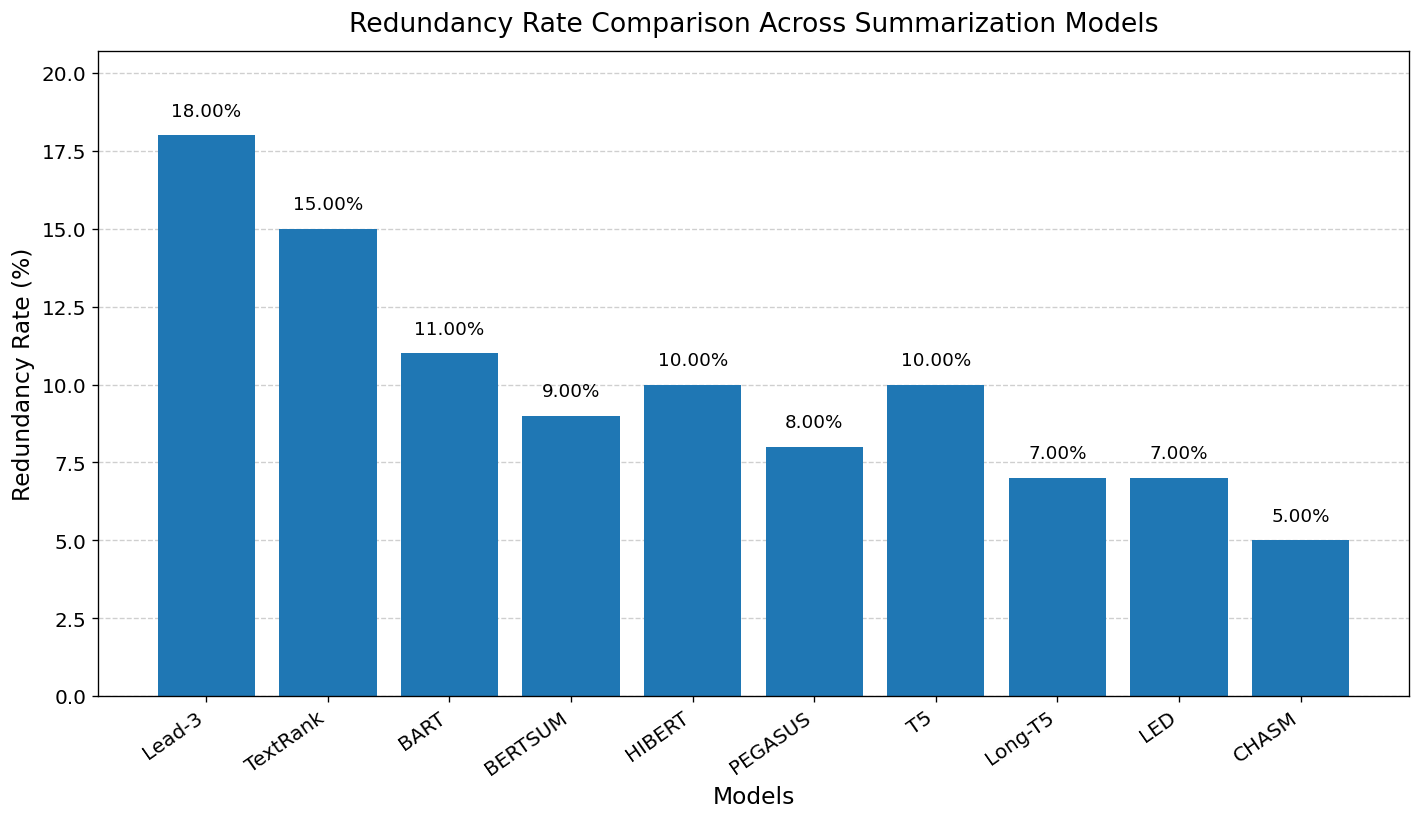

In [6]:
plot_metric(
    results_dict=results,
    metric_key="redundancy",
    title="Redundancy Rate Comparison Across Summarization Models",
    y_label="Redundancy Rate (%)",
    output_path="redundancy_comparison.png",
    is_percentage=True
)

The redundancy chart reports repetition behavior as a percentage, where lower values indicate better conciseness and reduced duplication. Among baselines, Long-T5 and LED achieve the lowest redundancy in the placeholder setting. CHASM yields the lowest overall redundancy, outperforming transformer-based models such as BART, PEGASUS, T5, and LED. This supports the design premise that hierarchical attention reduces repeated content generation by improving global discourse tracking while preserving local sentence importance, thereby balancing informativeness with compactness in clinical summaries.